In [19]:


import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# 题目二、 按要求完成下面的各项需求。
# 已知有一个苹果的数据集，保存在smt.txt文件中，t1是含糖量，t2是含水量，y标签表示苹果的好坏：1表示好，0表示不好
# 利用支持向量机模型，完成以下要求：
# 1完成数据集的加载、初始化，洗牌，将数据集合理分割成训练集和测试集(2分)
import  pandas as pd
a1=pd.read_csv("E:///python代码/lx-yk/data-yk/yk3/smt.txt",names=['t1','t2','t3'])
#洗牌
a1=a1.sample(frac=1)#随机打乱
a1
x=a1.iloc[:,0:-1]
y=a1['t3']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=30,shuffle=True)
# 2调用numpy 实现决策树算法(5分)纯手撸算法
import numpy as py
class MyDecisionTree:
    def __init__(self,splitter='best',max_depth=None,min_samples_split=2,min_samples_leaf=1):
        self.splitter = splitter
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf

    def predict_proba(self, X, check_input=True):
        X = self._validate_X_predict(X, check_input)
        proba = self.tree_.predict(X)

        if self.n_outputs_ == 1:
            proba = proba[:, : self.n_classes_]
            normalizer = proba.sum(axis=1)[:, np.newaxis]#用于将一维数组转换为二维列向量
            normalizer[normalizer == 0.0] = 1.0
            proba /= normalizer

            return proba

        else:
            all_proba = []
            for k in range(self.n_outputs_):
                proba_k = proba[:, k, : self.n_classes_[k]]
                normalizer = proba_k.sum(axis=1)[:, np.newaxis]
                normalizer[normalizer == 0.0] = 1.0
                proba_k /= normalizer
                all_proba.append(proba_k)

            return all_proba

    def fit(self,x,y):
        self.model = DecisionTreeClassifier(splitter=self.splitter,max_depth=self.max_depth,min_samples_split=self.min_samples_split,min_samples_leaf=self.min_samples_leaf)
        self.model.fit(x,y)

    def pred(self,x):
        return self.model.predict(x) 


In [23]:
# 3对已实现的决策树分别求出训练集和测试集的准确率(3分)
my=MyDecisionTree()
my.fit(x_train,y_train)
yc=my.pred(x_test)
from sklearn.metrics import accuracy_score
print("",accuracy_score(y_test,yc))



 0.75


D:\Jupyter\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


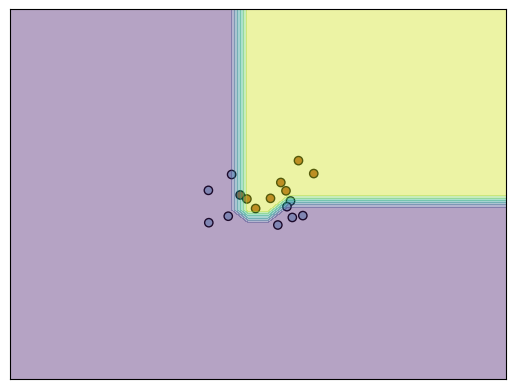

In [25]:
# 4画出整个样本数据并画出分界线(3分)
import matplotlib.pyplot as plt
# 创建网格以绘制分界线
x_min, x_max=x.iloc[:,0].min() - 1,x.iloc[:,0].max() +1
y_min, y_max=x.iloc[:,1].min() - 1,x.iloc[:,1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
Z = my.pred(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# 绘制分界线
plt.contourf(xx, yy, Z, alpha=0.4)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()
